# 0.0 Imports

In [84]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sweetviz as sv

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../data/df_raw.csv')

In [4]:
df['first_issue_date'] = pd.to_datetime(df['first_issue_date'] )
df['first_redeem_date'] = pd.to_datetime(df['first_redeem_date'])
df['last_transaction_datetime'] = pd.to_datetime(df['last_transaction_datetime'])

In [5]:
df.head()

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
0,000012768d,0,1,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,2019-03-14 15:01:47+00:00,4,1.038462,3,46,25.7,0,0,0,2803.00
1,000036f903,1,1,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F,2019-03-17 10:29:37+00:00,32,1.043210,5,96,54.9,60,0,0,9805.00
2,00010925a5,1,1,2018-07-24 16:21:29,2018-09-14 16:12:49,83,U,2019-03-08 07:09:50+00:00,18,1.012821,2,58,31.8,0,-17,0,5883.00
3,0001f552b0,1,1,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F,2019-03-16 10:54:02+00:00,15,1.232558,4,79,78.9,0,0,0,6155.18
4,00020e7b18,1,1,2017-11-27 11:41:45,2018-01-10 17:50:05,73,U,2019-03-15 12:04:23+00:00,18,1.448529,4,175,286.1,0,-592,-30,25819.61


In [5]:
df_train, df_val = train_test_split(df, test_size=0.30, stratify=df[['treatment_flg', 'target']], random_state=42)

In [6]:
df_train.head()

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
94636,78cba16ea5,1,1,2018-04-28 15:00:17,2018-07-13 15:03:33,66,U,2019-03-12 11:54:13+00:00,6,0.960000,4,22,24.1,0,-10,-80,1875.28
198143,fd95d169d5,1,0,2018-06-08 17:31:57,2018-07-29 18:13:15,53,U,2019-03-18 12:26:42+00:00,3,1.023810,1,39,40.8,0,0,0,4004.32
155992,c7d4695141,1,1,2017-10-21 09:58:27,2017-12-23 11:05:20,65,U,2019-03-10 09:41:31+00:00,25,1.277372,3,58,41.9,0,0,0,7973.00
135599,add3b0a38c,0,1,2017-10-26 19:11:16,2017-12-25 19:16:06,43,U,2019-03-07 15:40:11+00:00,7,1.120690,2,50,36.8,0,-2,-30,4224.56
106432,8814fa54da,1,1,2018-01-18 15:05:17,2018-04-07 15:14:36,38,U,2019-03-15 18:35:57+00:00,32,1.120000,1,70,45.5,0,-37,-30,7180.63


# 1.0 Data Cleaning

In [8]:
df_train.shape

(140027, 17)

In [7]:
df_train.describe()

,treatment_flg,target,age,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
count,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000
mean,0.499804,0.619888,46.405415,20.101673,1.256926,2.919158,75.151042,77.879755,0.792669,-72.872182,-6.438944,8580.332625
std,0.500002,0.485416,45.879438,17.745769,0.540225,1.991137,56.055498,99.457005,7.636134,132.437715,16.283654,8888.925909
min,0.000000,0.000000,-7491.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-10131.000000,-330.000000,1.040000
25%,0.000000,0.000000,33.000000,8.000000,1.068966,2.000000,35.000000,23.300000,0.000000,-98.000000,0.000000,3147.655000
50%,0.000000,1.000000,45.000000,15.000000,1.181818,2.000000,62.000000,49.200000,0.000000,-27.000000,0.000000,6098.130000
75%,1.000000,1.000000,59.000000,27.000000,1.343750,4.000000,101.000000,96.600000,0.000000,0.000000,0.000000,11094.630000
max,1.000000,1.000000,1852.000000,320.000000,120.000000,57.000000,1317.000000,8635.000000,300.000000,0.000000,0.000000,504490.380000


## 1.1 Age

Como a quantidade de pessoas com idades "estranhas" é pequena, vou seguir inputando a mediana.

In [8]:
df_train.loc[(df_train['age']<10) | (df_train['age']>100), 'age'] = df_train['age'].median()

In [9]:
df_train.describe()

,treatment_flg,target,age,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
count,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000,140027.000000
mean,0.499804,0.619888,46.365130,20.101673,1.256926,2.919158,75.151042,77.879755,0.792669,-72.872182,-6.438944,8580.332625
std,0.500002,0.485416,15.880181,17.745769,0.540225,1.991137,56.055498,99.457005,7.636134,132.437715,16.283654,8888.925909
min,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-10131.000000,-330.000000,1.040000
25%,0.000000,0.000000,34.000000,8.000000,1.068966,2.000000,35.000000,23.300000,0.000000,-98.000000,0.000000,3147.655000
50%,0.000000,1.000000,45.000000,15.000000,1.181818,2.000000,62.000000,49.200000,0.000000,-27.000000,0.000000,6098.130000
75%,1.000000,1.000000,59.000000,27.000000,1.343750,4.000000,101.000000,96.600000,0.000000,0.000000,0.000000,11094.630000
max,1.000000,1.000000,100.000000,320.000000,120.000000,57.000000,1317.000000,8635.000000,300.000000,0.000000,0.000000,504490.380000


## 1.2 n_stores

In [10]:
df_train.query('n_stores >= 40')

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
9803,0c89dd7451,1,1,2017-08-19 17:02:11,2018-01-04 11:52:07,46,F,2019-03-18 09:28:16+00:00,52,1.192118,46,151,137.8,0,-166,0,14805.85
57340,49281b577d,1,1,2017-06-10 13:21:18,2017-12-31 15:14:12,53,M,2019-03-18 07:48:37+00:00,150,5.617949,40,85,338.3,0,-388,0,53524.00
101794,821316bc69,1,1,2017-05-16 22:13:58,2017-08-02 14:59:57,46,M,2019-03-11 12:45:22+00:00,51,1.132275,40,95,75.9,0,-46,0,14991.21
109173,8b9de0afcc,1,1,2017-10-18 18:15:42,2018-12-09 15:47:37,30,U,2019-03-18 09:12:15+00:00,101,1.228261,49,121,75.4,0,-381,0,12708.43
88584,710cd5a198,0,1,2017-09-06 18:19:43,2018-01-09 09:56:20,29,F,2019-03-15 14:50:47+00:00,65,1.789474,57,140,333.5,0,-324,-30,15384.50
136943,af81fa3385,0,1,2017-08-12 20:34:44,2017-09-20 19:54:43,24,M,2019-03-18 18:32:30+00:00,88,1.080460,53,198,83.3,0,-77,0,18118.94


## n_products

In [11]:
df_train.query('n_products > 1000')

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
104938,862ac62688,0,1,2017-04-12 16:01:19,2017-04-19 20:18:25,50,M,2019-03-18 19:26:38+00:00,228,1.34951,4,1317,1714.5,0,-1573,0,198451.5


In [12]:
df_train.query('total_amount_spent > 100000').sample(10)

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
137337,affbb7cec7,1,1,2017-05-26 19:10:32,2017-06-19 19:31:37,36,U,2019-03-17 13:41:32+00:00,80,1.648402,1,579,2821.8,0,-2824,0,164409.70
46265,3aed2d5032,0,1,2017-11-16 22:24:58,2018-03-06 19:48:43,30,U,2019-03-18 16:56:43+00:00,42,1.329146,4,391,984.5,0,-1914,-30,100192.27
27000,226f59270b,1,1,2017-06-02 20:02:45,2017-07-12 20:42:09,53,U,2019-03-16 15:38:35+00:00,61,1.084379,6,374,1014.9,0,-986,0,102537.34
93765,77b61508ce,0,1,2017-06-02 21:31:08,2018-01-05 12:22:56,58,U,2019-03-16 18:56:43+00:00,92,2.089866,2,173,1000.9,0,-137,0,124895.00
99883,7f8d8d7881,1,1,2017-05-24 14:48:38,2017-12-06 16:48:52,55,F,2019-03-14 11:23:40+00:00,25,3.154374,5,169,1098.5,0,-930,0,130517.00
31293,27e57f3d9d,0,1,2017-09-15 19:32:35,2018-11-06 20:14:33,50,F,2019-03-18 16:25:26+00:00,77,3.188406,1,158,1851.3,0,-2045,0,115685.94
144273,b8c4357493,1,1,2017-04-20 15:45:38,2018-02-06 16:39:05,42,U,2019-03-18 15:14:47+00:00,52,1.382812,2,329,928.2,0,-1829,0,103825.64
34699,2c3ce0e0ac,1,1,2017-04-11 14:10:25,2017-05-06 15:02:06,53,M,2019-03-18 09:23:10+00:00,69,1.347339,2,99,183.0,0,-210,0,106047.00
146669,bbfc5cbb59,1,1,2017-06-05 21:12:48,2017-08-10 18:14:16,47,F,2019-03-18 06:58:04+00:00,248,1.262253,9,503,1097.0,0,-1116,-30,103836.99
22313,1c80395818,1,1,2017-04-21 13:40:20,2018-01-02 21:14:02,36,U,2019-03-18 13:31:57+00:00,51,1.379070,1,320,1598.5,0,-1311,0,120505.13


## first_redeem_date

Vou assumir que quem está com o redeem vazio ainda não teve nenhum redeem. Para tratar, vou colocar uma data bem no futuro (pode ser hoje inclusive). A ideia de colocar essa data bem no futuro é distanciar os dados de quem já teve algum redeem

In [13]:
df_train['first_redeem_date'].max() + pd.Timedelta(days=365)

Timestamp('2020-11-19 01:14:10')

In [14]:
df_train['first_redeem_date'] = df_train['first_redeem_date'].fillna(df_train['first_redeem_date'].max() + pd.Timedelta(days=365))

/tmp/ipykernel_5418/1213026385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['first_redeem_date'] = df_train['first_redeem_date'].fillna(df_train['first_redeem_date'].max() + pd.Timedelta(days=365))


In [17]:
df_train.isna().sum()

client_id                    0
treatment_flg                0
target                       0
first_issue_date             0
first_redeem_date            0
age                          0
gender                       0
last_transaction_datetime    0
n_transactions               0
mean_product_quantity        0
n_stores                     0
n_products                   0
regular_points_received      0
express_points_received      0
regular_points_spent         0
express_points_spent         0
total_amount_spent           0
dtype: int64

# 2.0 Feature Engineering

Para criação de novas features, pensei em inicialment em trazer features que traduzam o modelo RFM, assumindo que a última transação foi em 2019-03-18 23:40:03

In [18]:
df_train.dtypes

client_id                                 object
treatment_flg                              int64
target                                     int64
first_issue_date                  datetime64[ns]
first_redeem_date                 datetime64[ns]
age                                        int64
gender                                    object
last_transaction_datetime    datetime64[ns, UTC]
n_transactions                             int64
mean_product_quantity                    float64
n_stores                                   int64
n_products                                 int64
regular_points_received                  float64
express_points_received                    int64
regular_points_spent                       int64
express_points_spent                       int64
total_amount_spent                       float64
dtype: object

In [15]:
df_train['last_transaction_datetime'] = df_train['last_transaction_datetime'].apply(lambda x: x.replace(tzinfo=None))

/tmp/ipykernel_5418/2138730660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['last_transaction_datetime'] = df_train['last_transaction_datetime'].apply(lambda x: x.replace(tzinfo=None))


In [16]:
# recencia
df_train['recency'] = df_train['last_transaction_datetime'].apply(lambda x: (pd.Timestamp('2019-03-20')-x).days)

/tmp/ipykernel_5418/2430204776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['recency'] = df_train['last_transaction_datetime'].apply(lambda x: (pd.Timestamp('2019-03-20')-x).days)


In [17]:
# ticket medio
df_train['avg_ticket'] = df_train[['total_amount_spent', 'n_transactions']].apply(lambda x: x[0]/x[1], axis=1)

/tmp/ipykernel_5418/316739299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['avg_ticket'] = df_train[['total_amount_spent', 'n_transactions']].apply(lambda x: x[0]/x[1], axis=1)


In [22]:
df_train.dtypes

client_id                            object
treatment_flg                         int64
target                                int64
first_issue_date             datetime64[ns]
first_redeem_date            datetime64[ns]
age                                   int64
gender                               object
last_transaction_datetime    datetime64[ns]
n_transactions                        int64
mean_product_quantity               float64
n_stores                              int64
n_products                            int64
regular_points_received             float64
express_points_received               int64
regular_points_spent                  int64
express_points_spent                  int64
total_amount_spent                  float64
recency                               int64
avg_ticket                          float64
dtype: object

In [18]:
df_train['issue_redeem_delay'] = df_train[['first_issue_date', 'first_redeem_date']].apply(lambda x: (x[1]-x[0]).days, axis=1)

/tmp/ipykernel_5418/1764236713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['issue_redeem_delay'] = df_train[['first_issue_date', 'first_redeem_date']].apply(lambda x: (x[1]-x[0]).days, axis=1)


In [19]:
df_train.head()

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent,recency,avg_ticket,issue_redeem_delay
94636,78cba16ea5,1,1,2018-04-28 15:00:17,2018-07-13 15:03:33,66,U,2019-03-12 11:54:13,6,0.960000,4,22,24.1,0,-10,-80,1875.28,7,312.546667,76
198143,fd95d169d5,1,0,2018-06-08 17:31:57,2018-07-29 18:13:15,53,U,2019-03-18 12:26:42,3,1.023810,1,39,40.8,0,0,0,4004.32,1,1334.773333,51
155992,c7d4695141,1,1,2017-10-21 09:58:27,2017-12-23 11:05:20,65,U,2019-03-10 09:41:31,25,1.277372,3,58,41.9,0,0,0,7973.00,9,318.920000,63
135599,add3b0a38c,0,1,2017-10-26 19:11:16,2017-12-25 19:16:06,43,U,2019-03-07 15:40:11,7,1.120690,2,50,36.8,0,-2,-30,4224.56,12,603.508571,60
106432,8814fa54da,1,1,2018-01-18 15:05:17,2018-04-07 15:14:36,38,U,2019-03-15 18:35:57,32,1.120000,1,70,45.5,0,-37,-30,7180.63,4,224.394687,79


# 3.0 Data transformation

In [21]:
df_train = df_train.drop(columns=['first_issue_date', 'first_redeem_date', 'last_transaction_datetime'])

                                             |          | [  0%]   00:00 -> (? left)


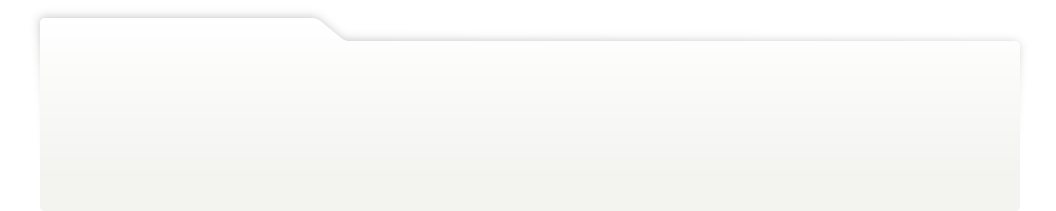
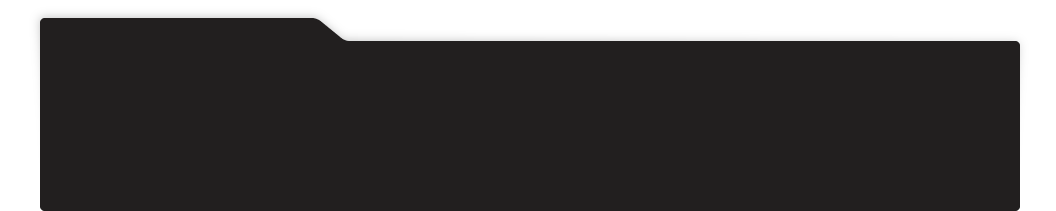
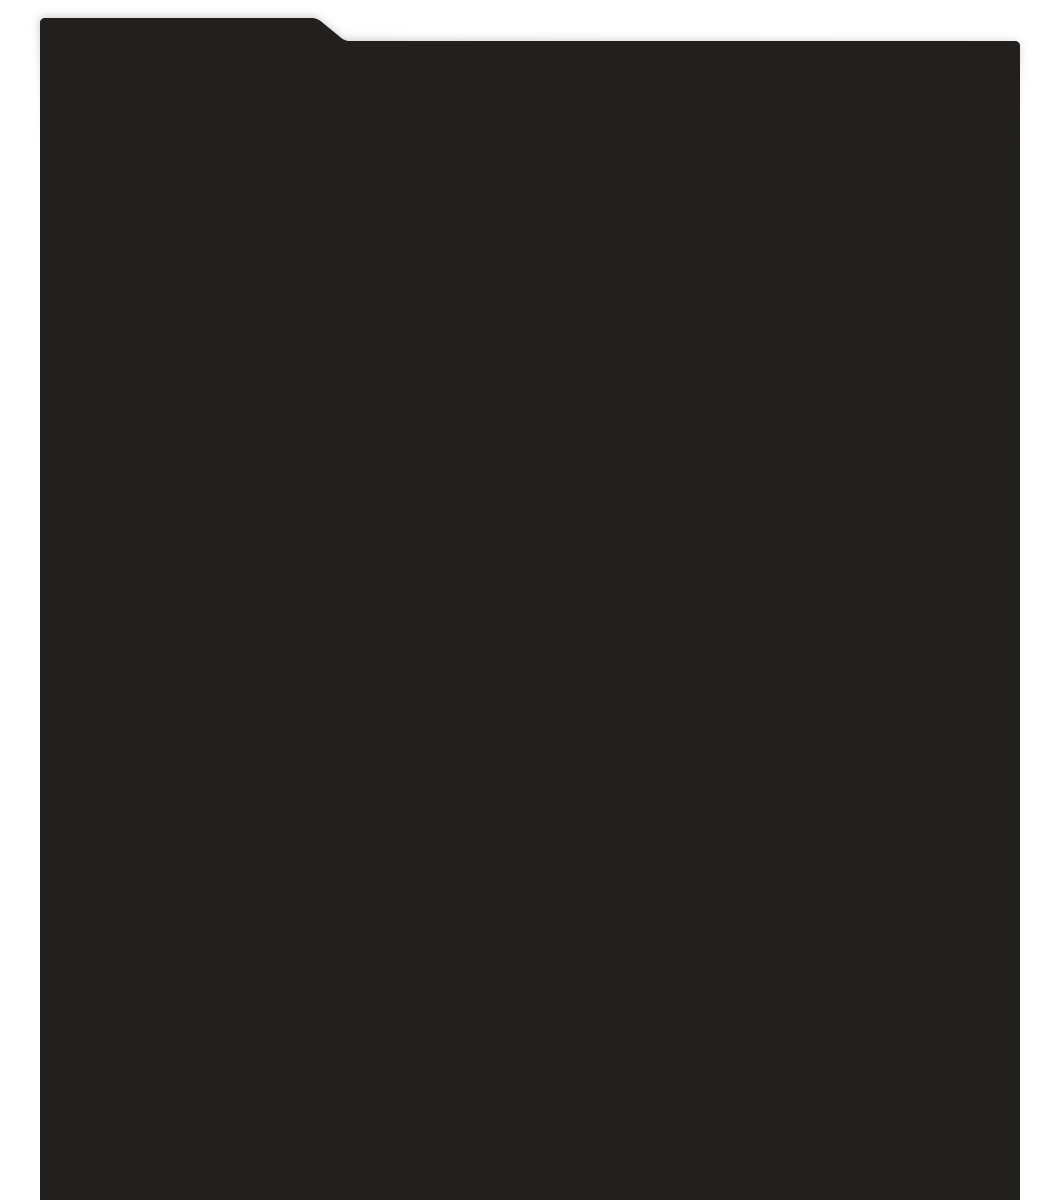
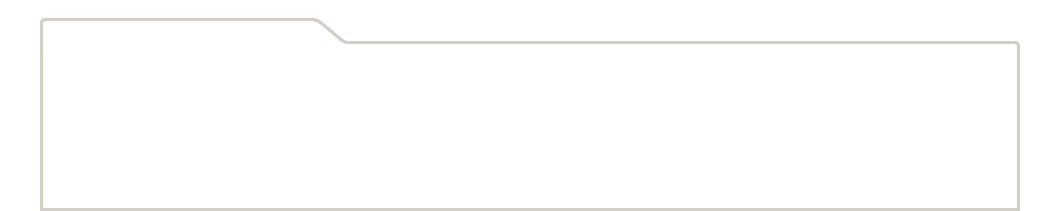
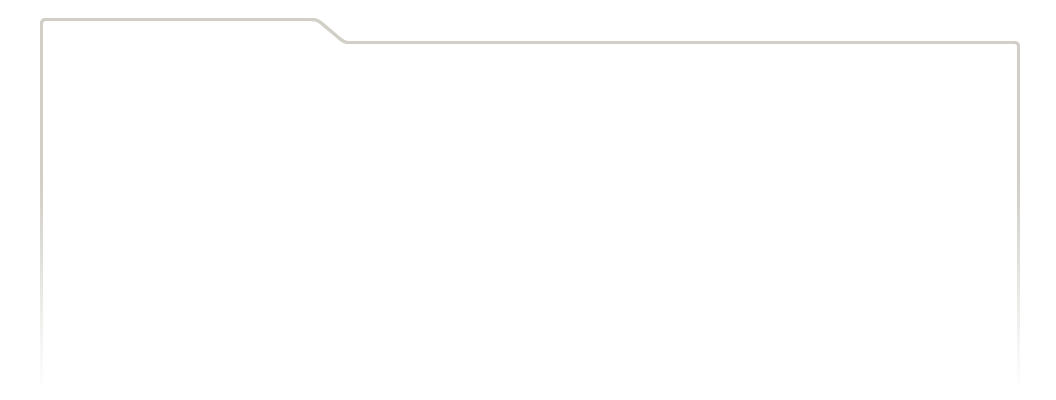
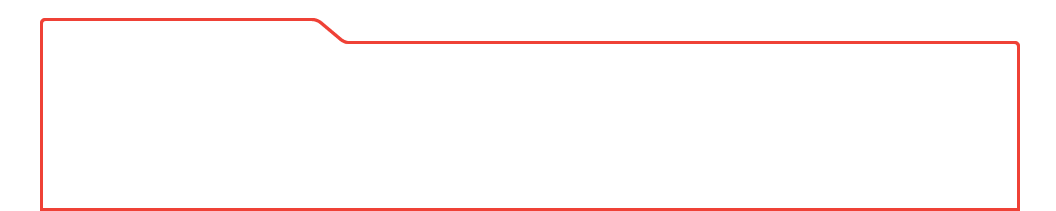
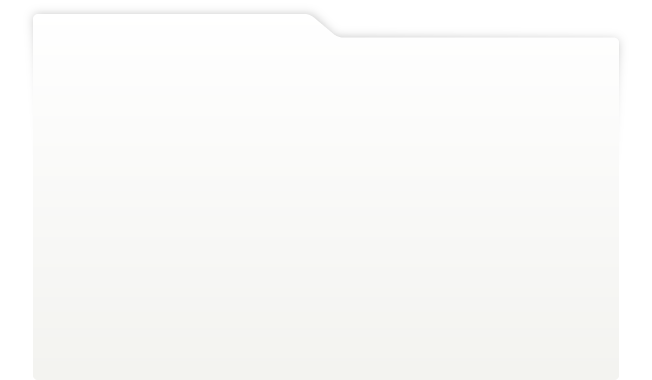
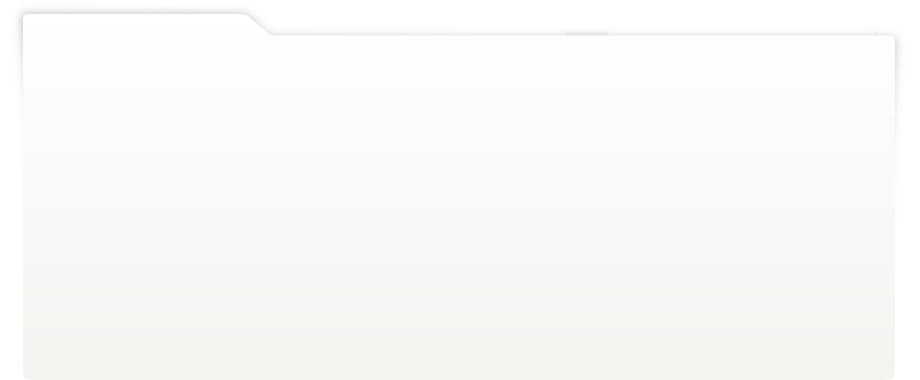
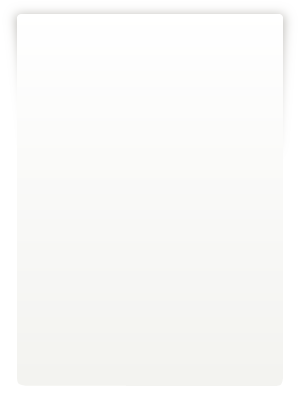
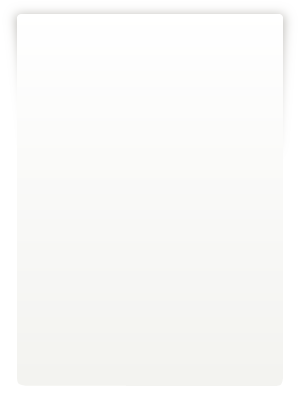
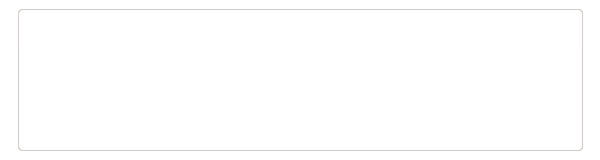
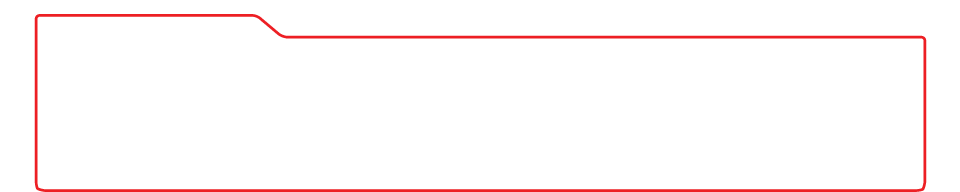
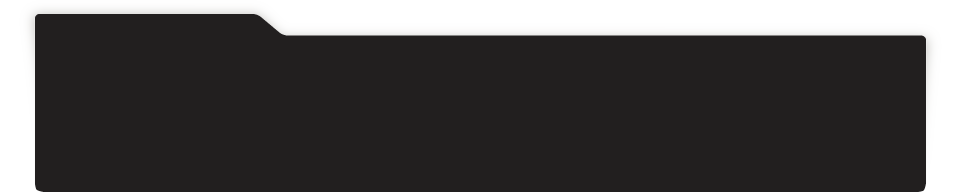
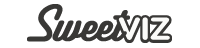
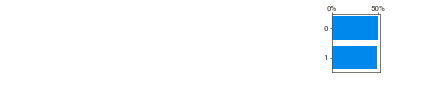
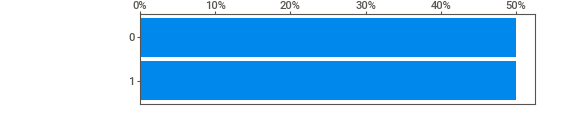
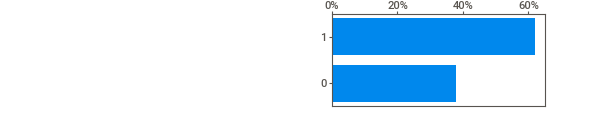
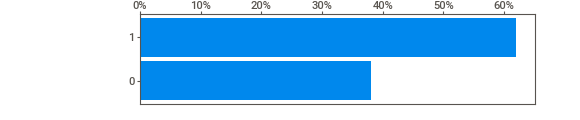
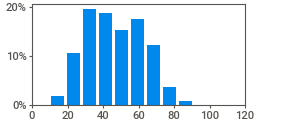
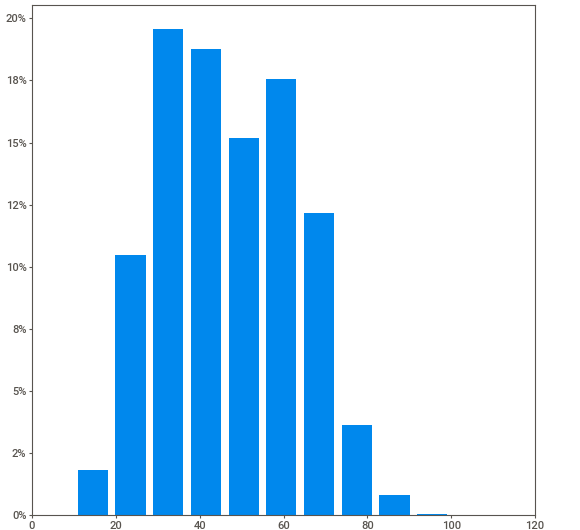
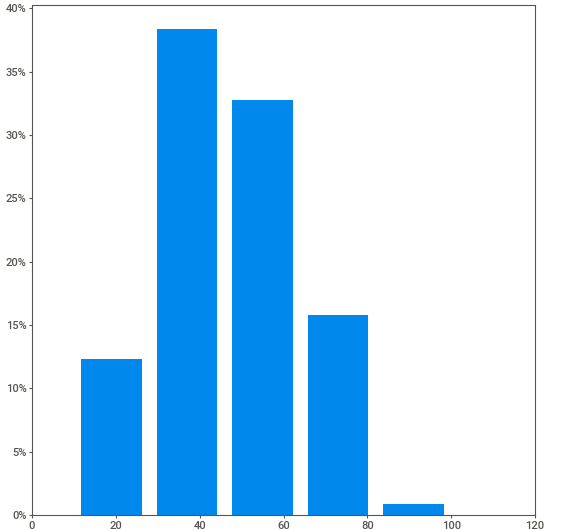
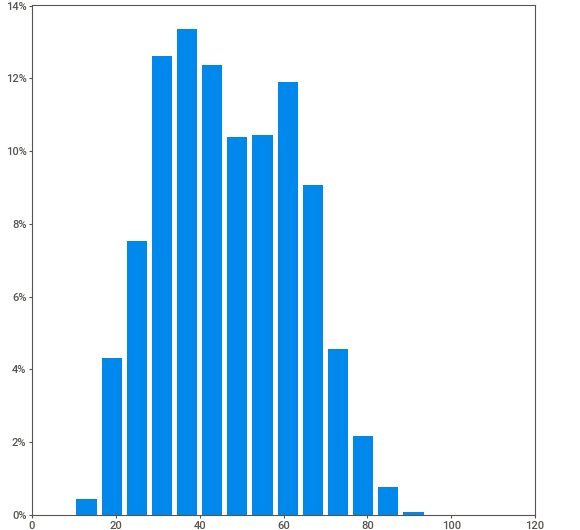
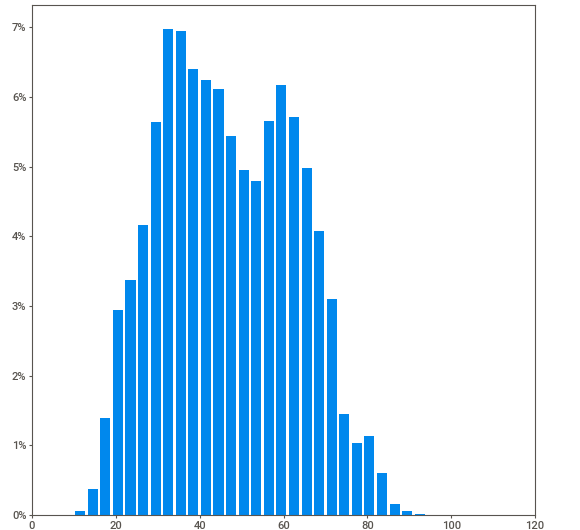
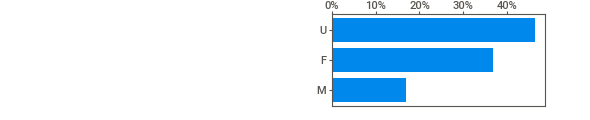
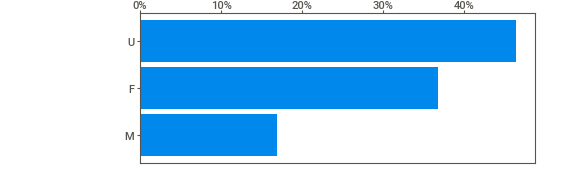
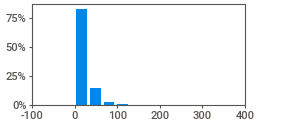
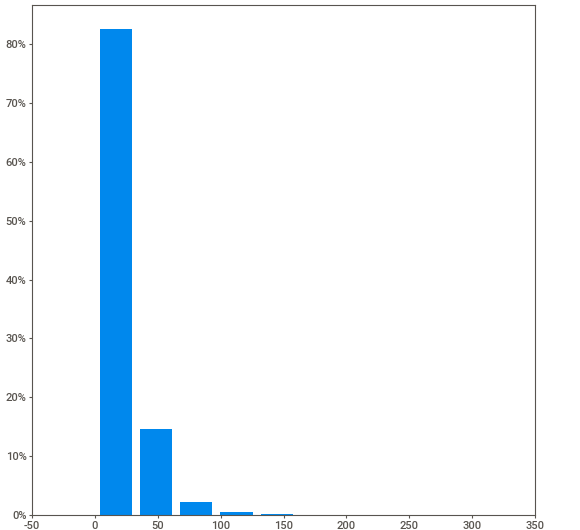
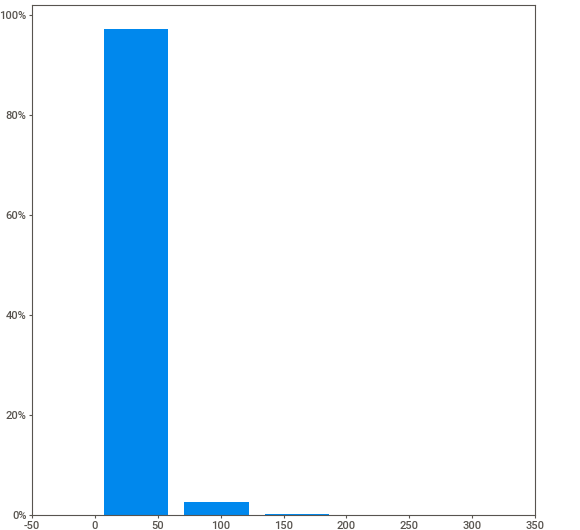
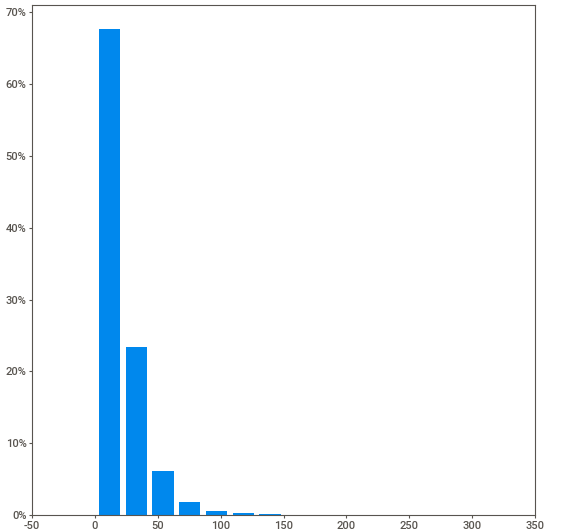
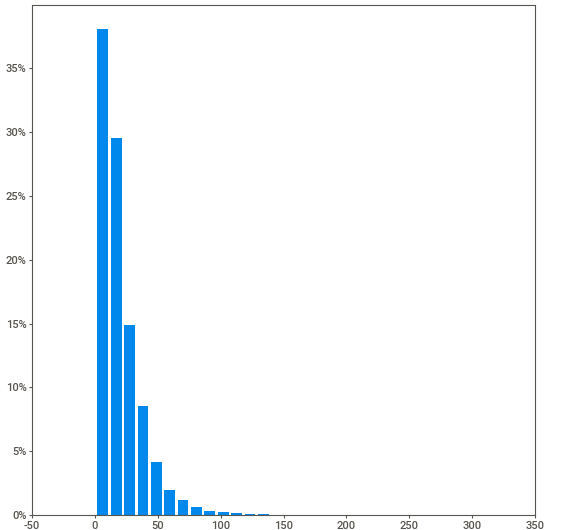
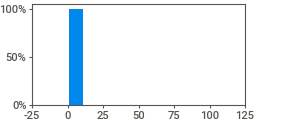
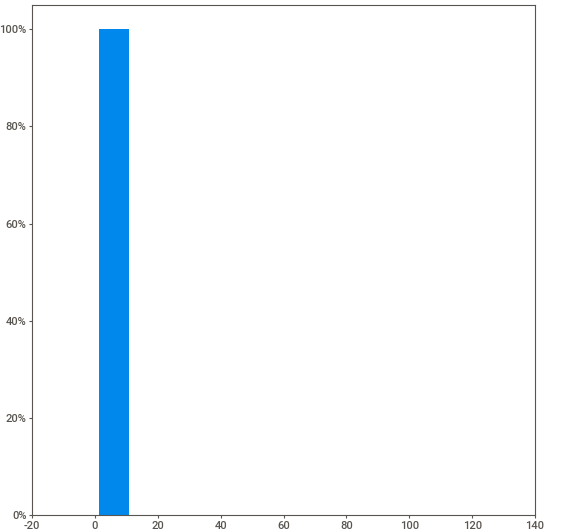
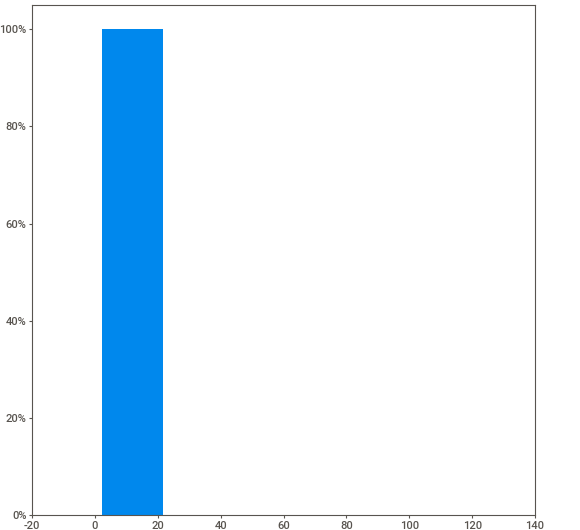
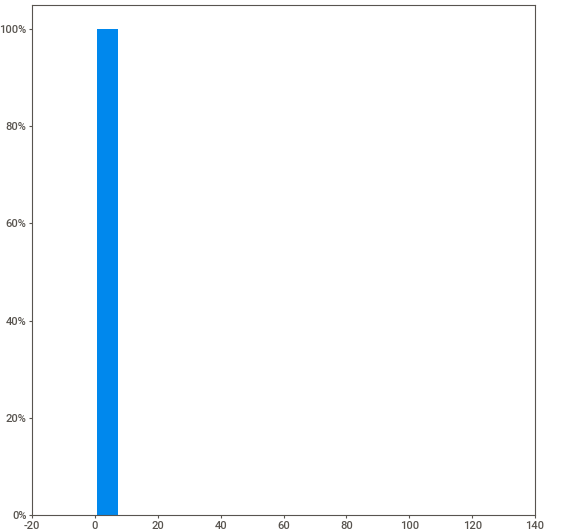
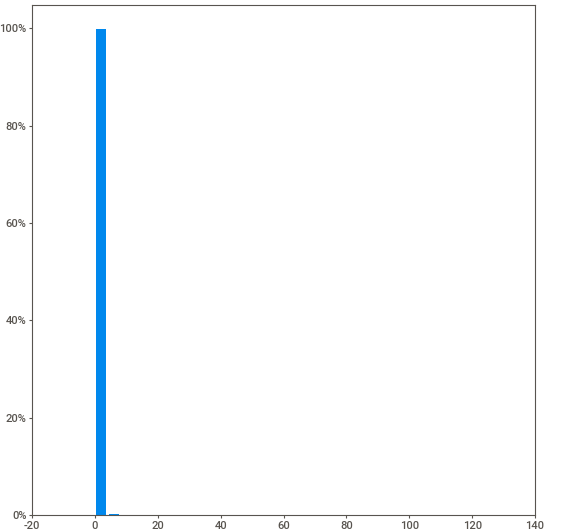
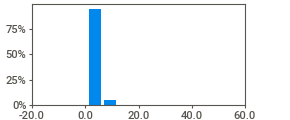
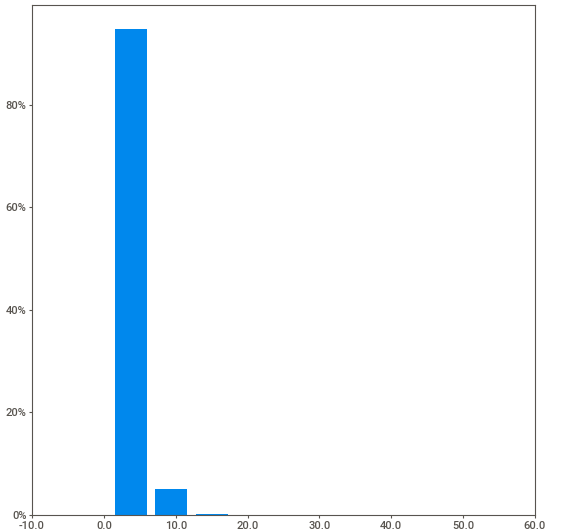
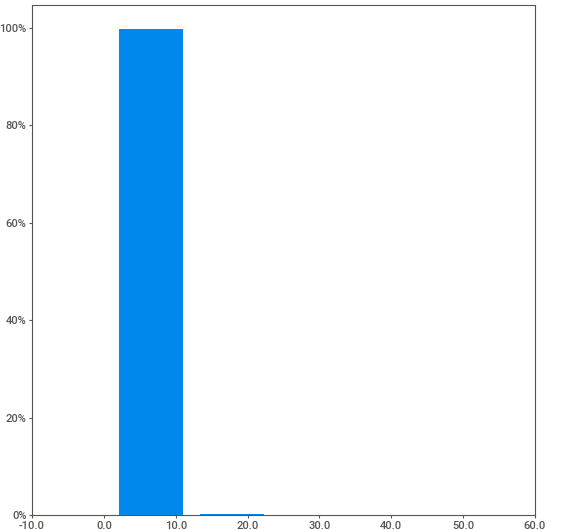
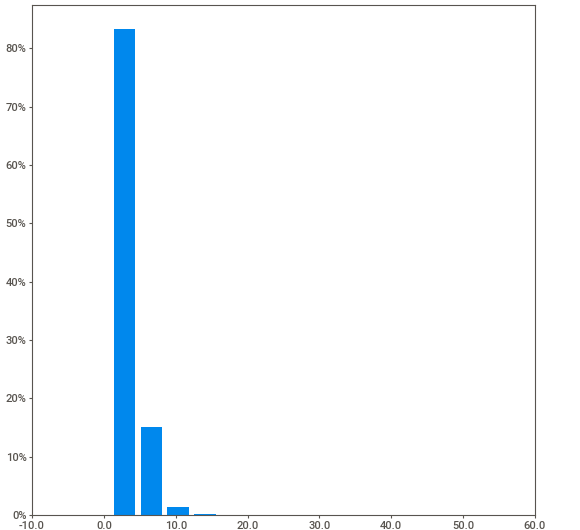
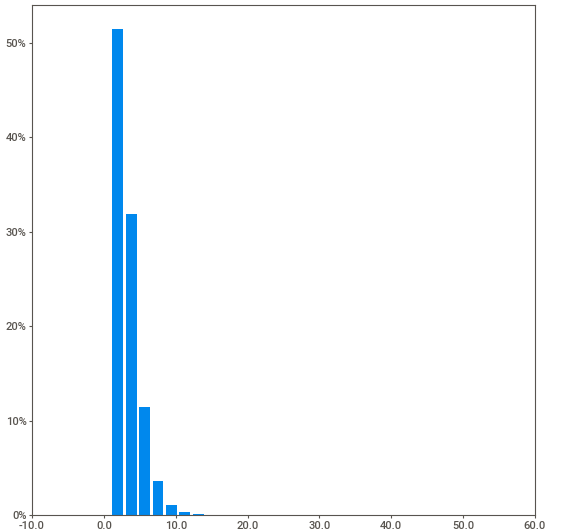
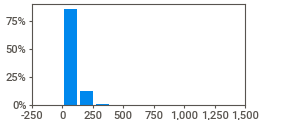
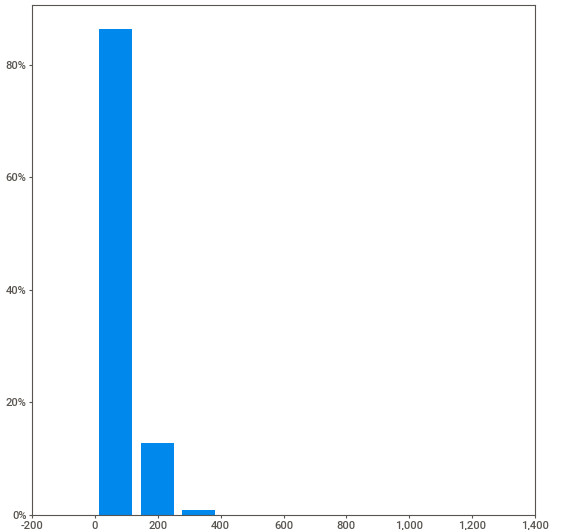
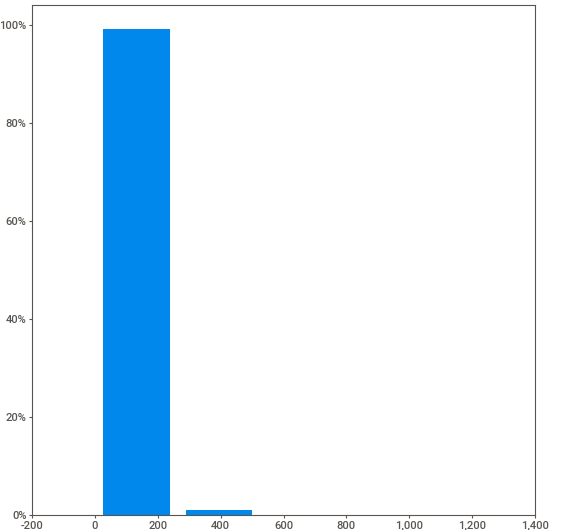
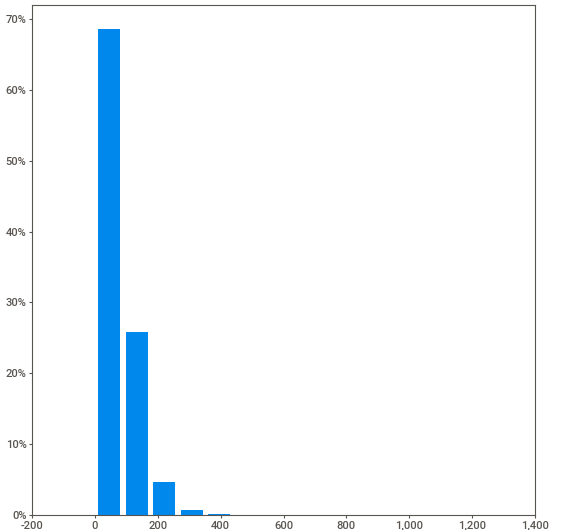
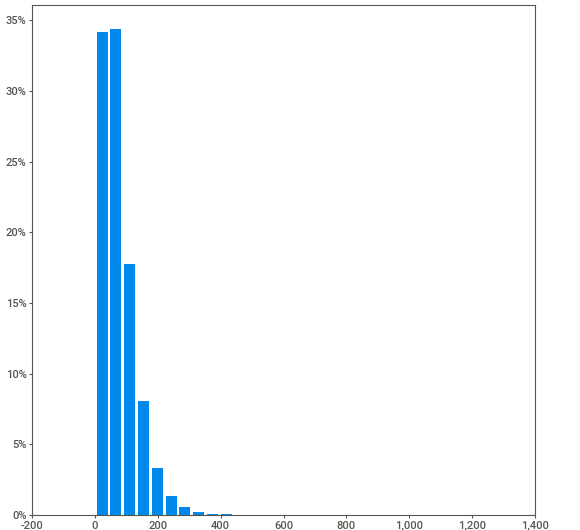
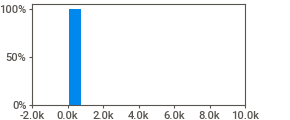
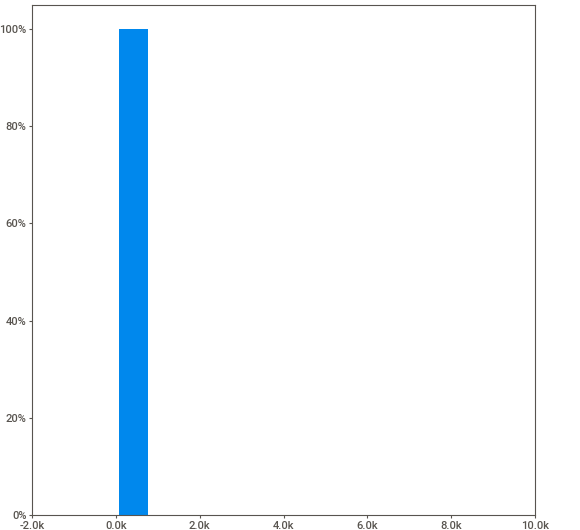
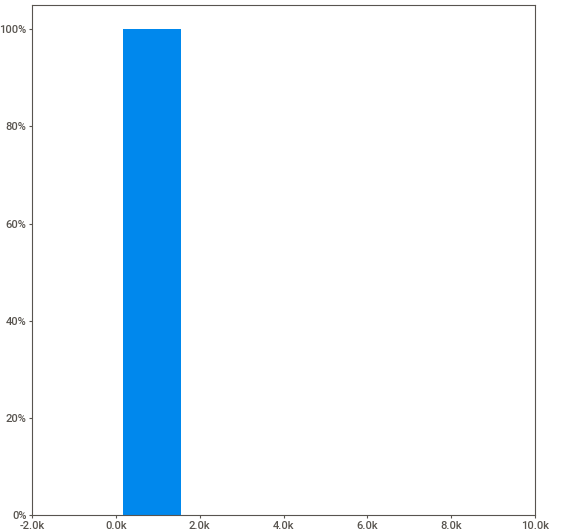
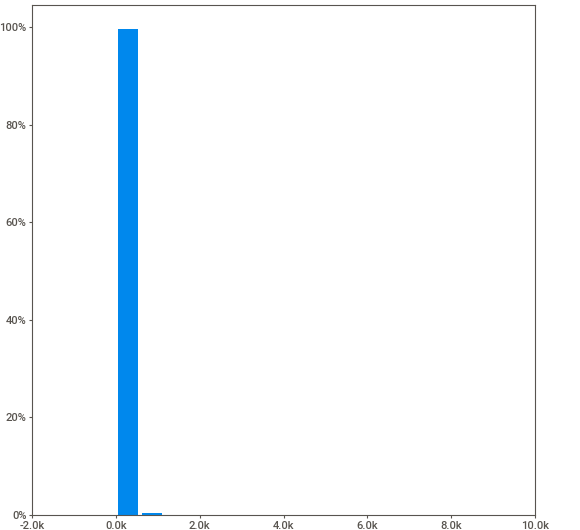
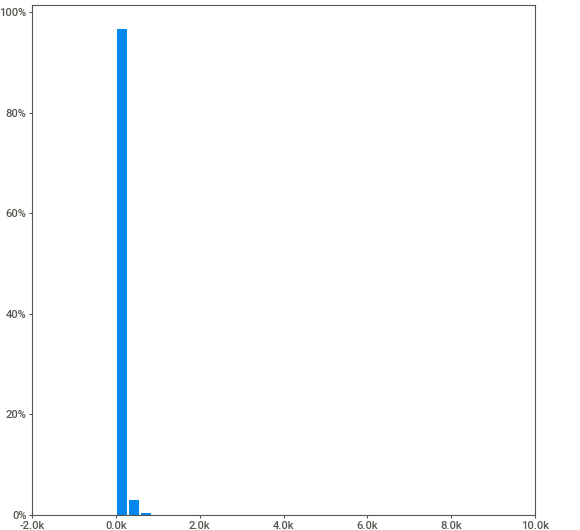
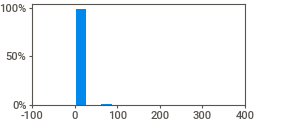
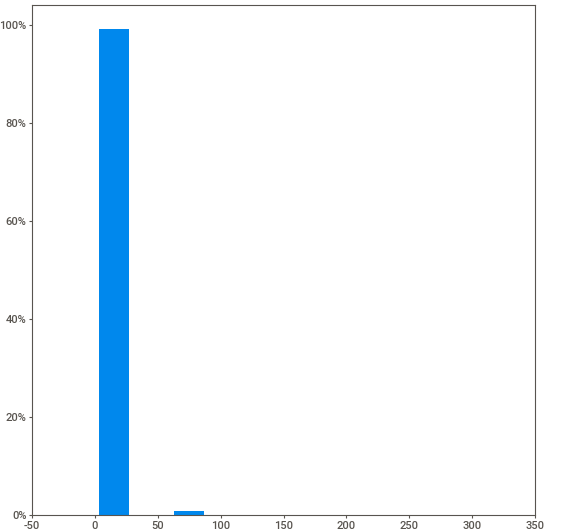
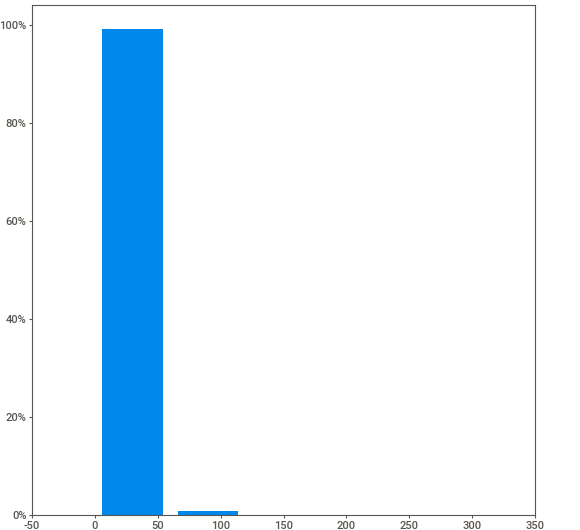
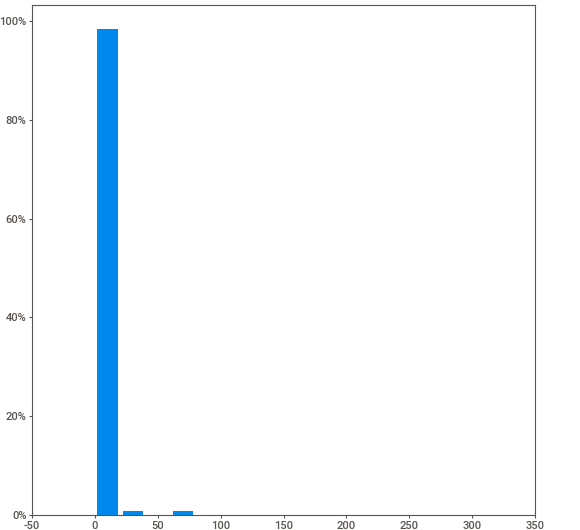
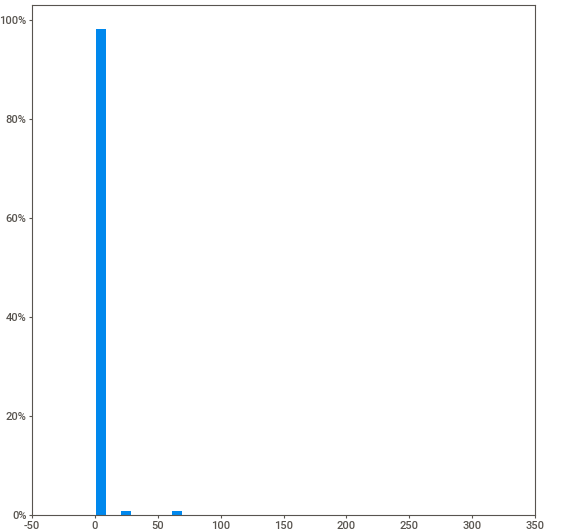
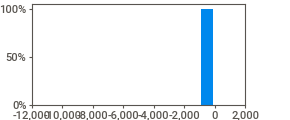
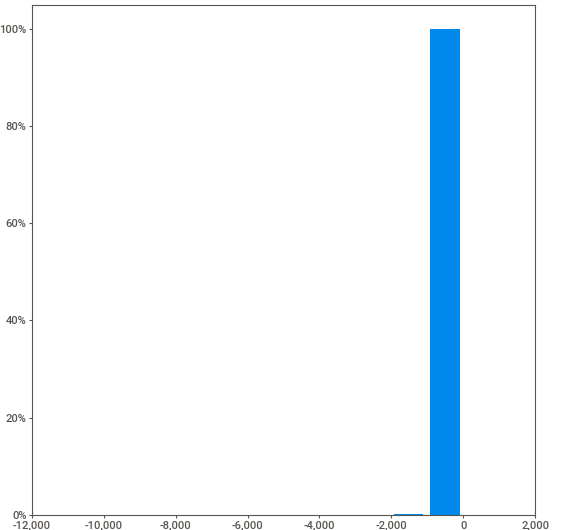
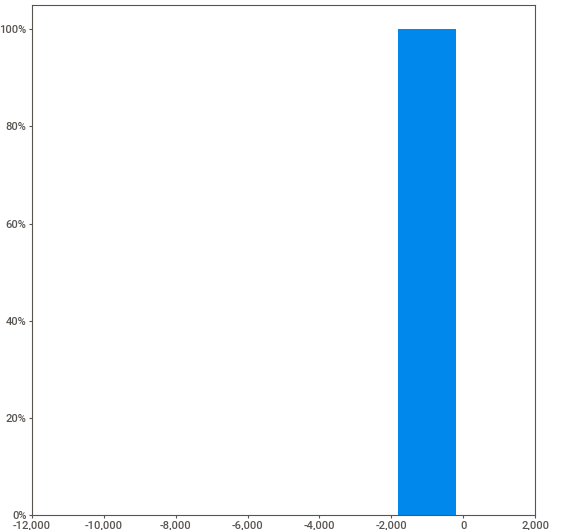
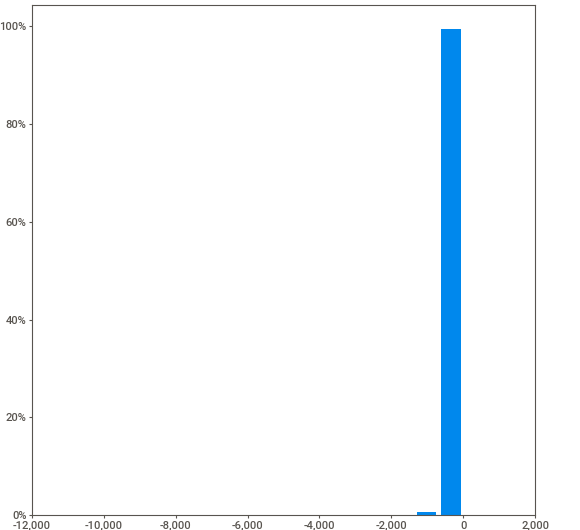
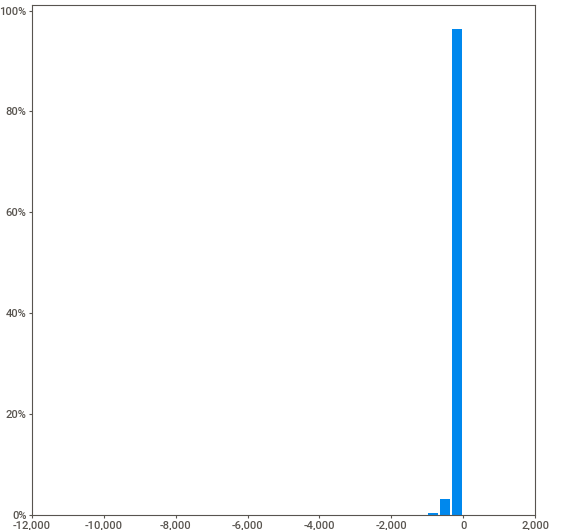
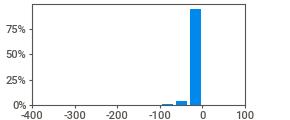
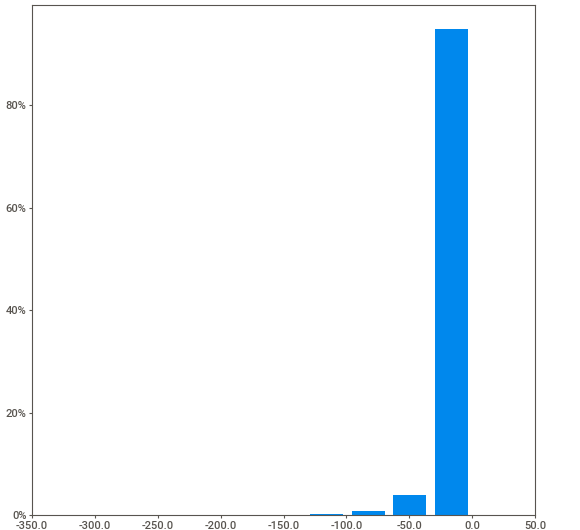
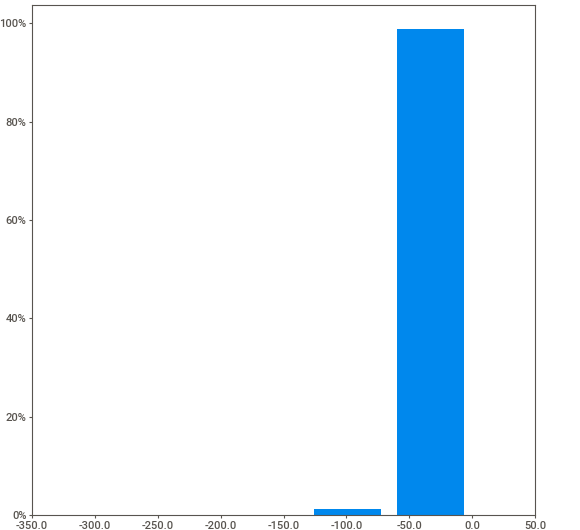
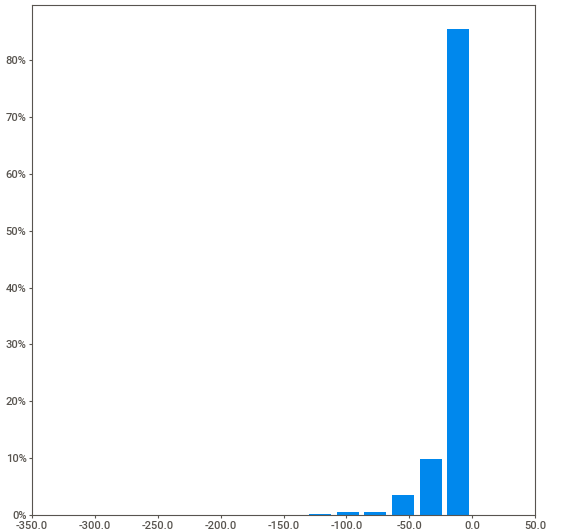
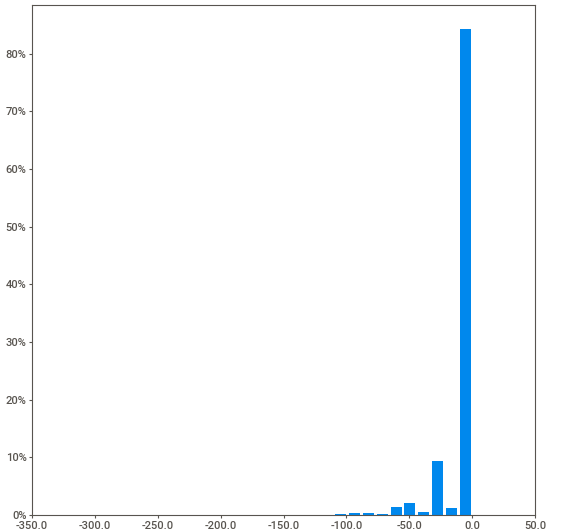
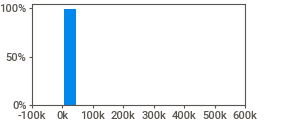
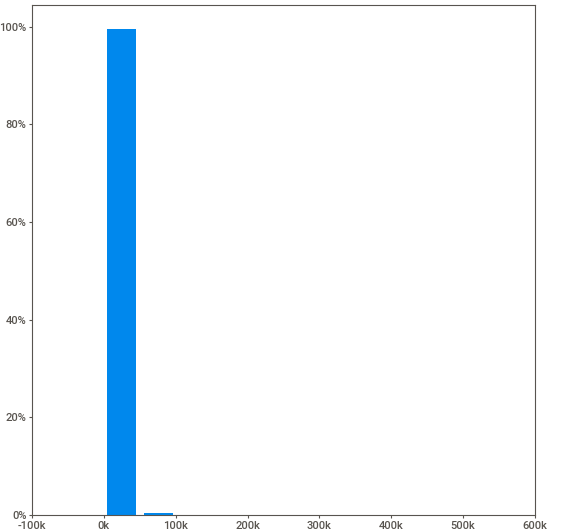
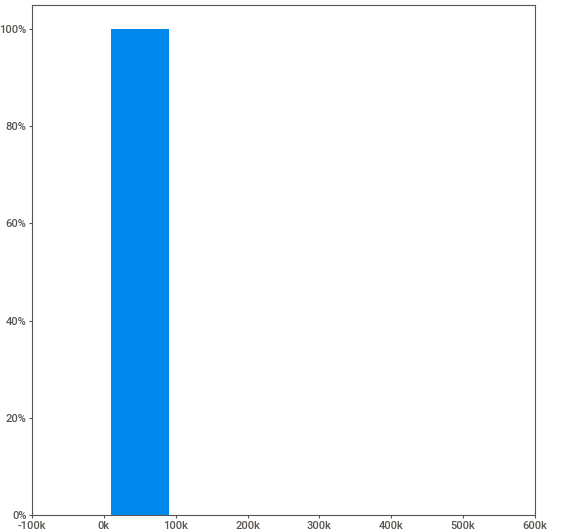
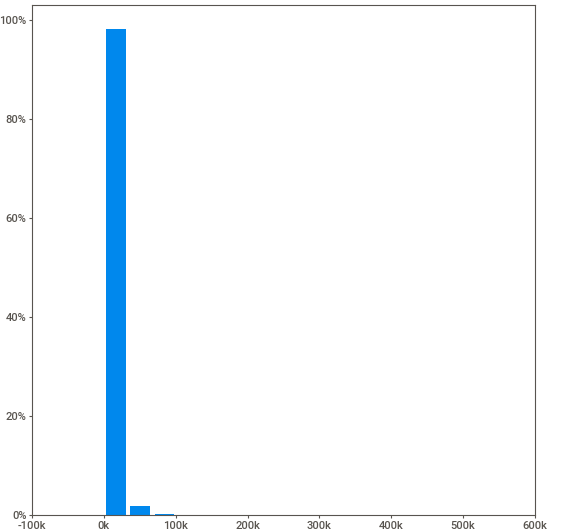
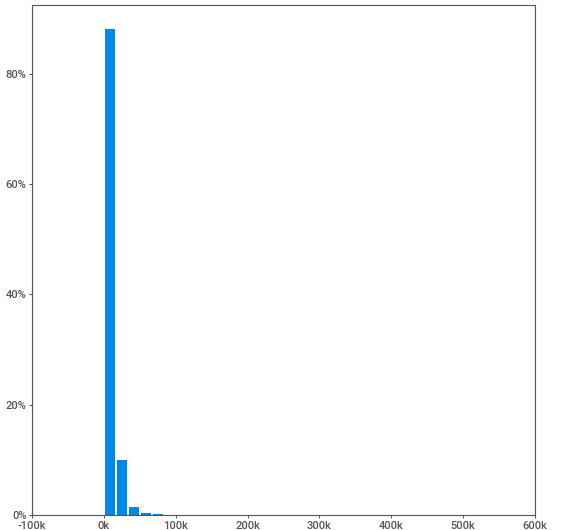
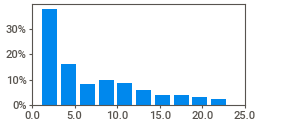
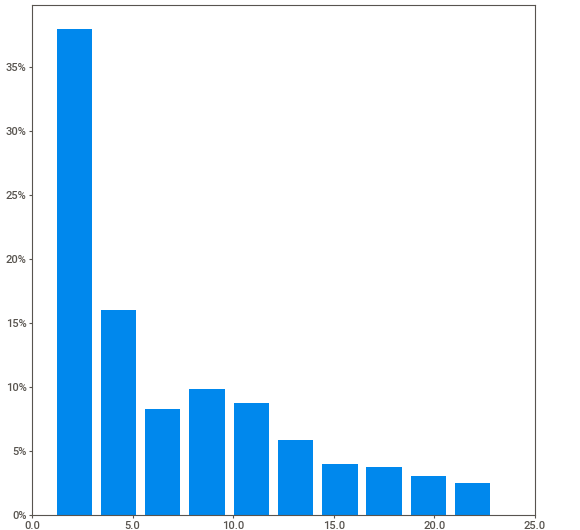
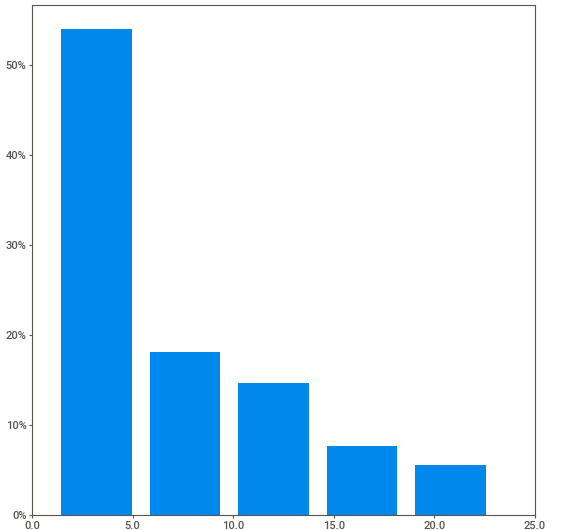
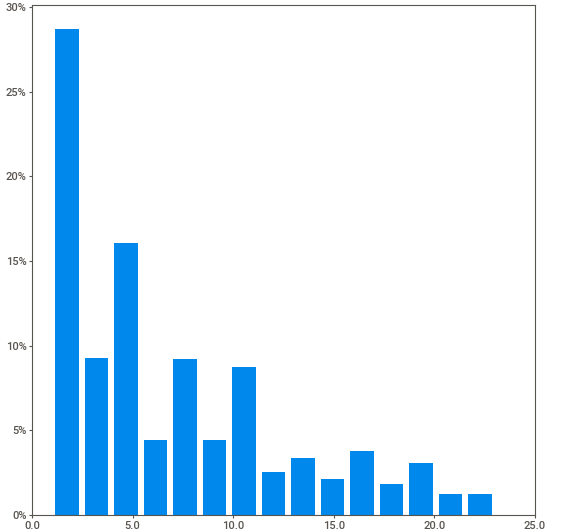
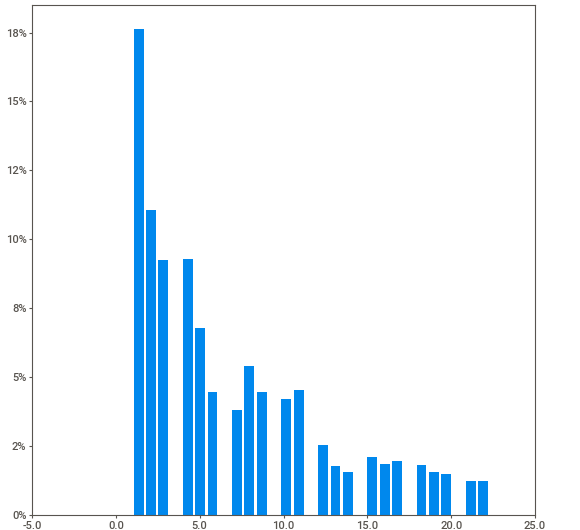
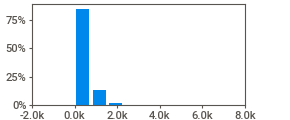
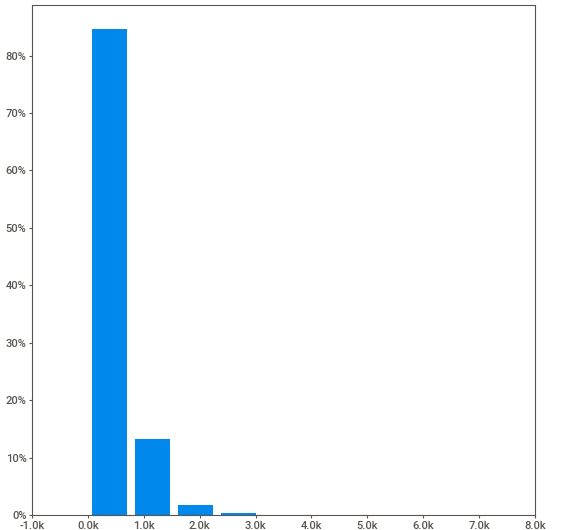
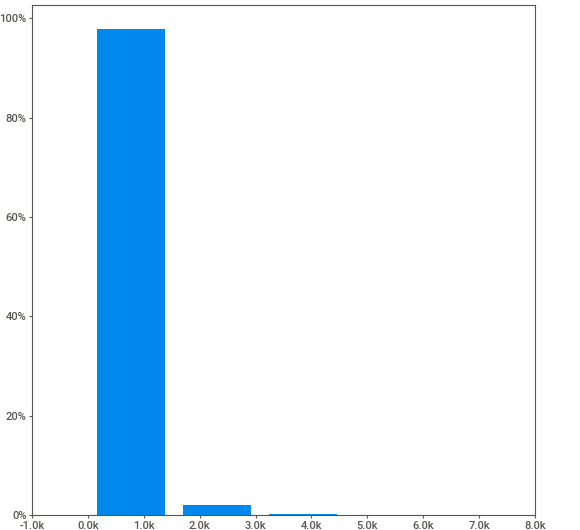
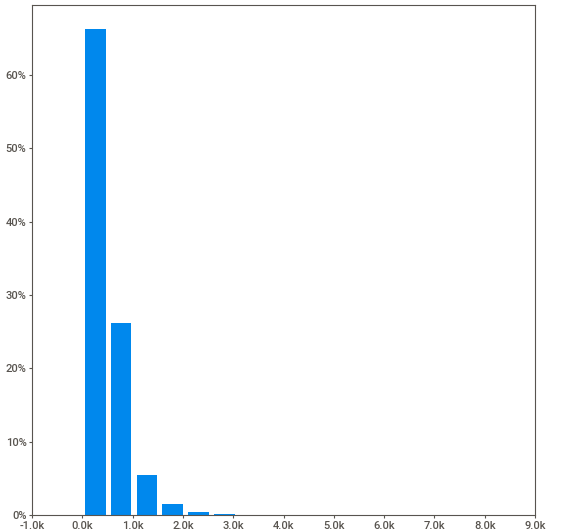
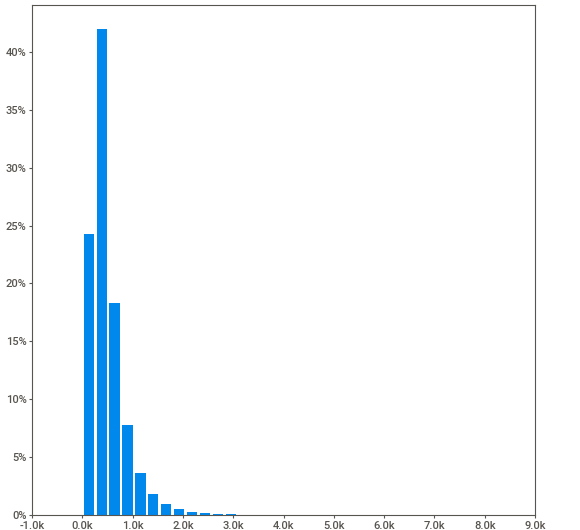
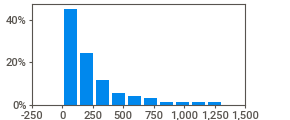
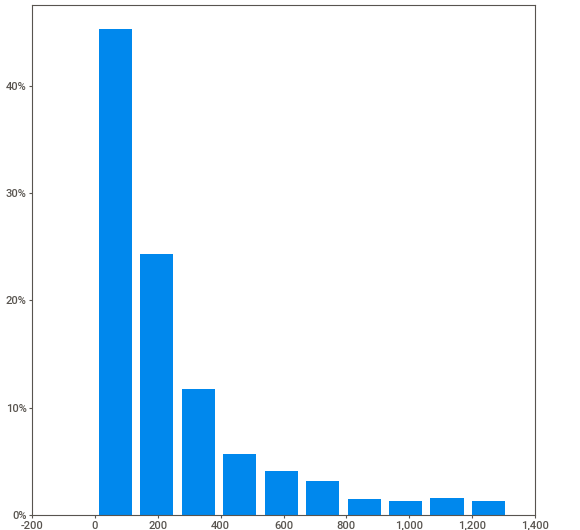
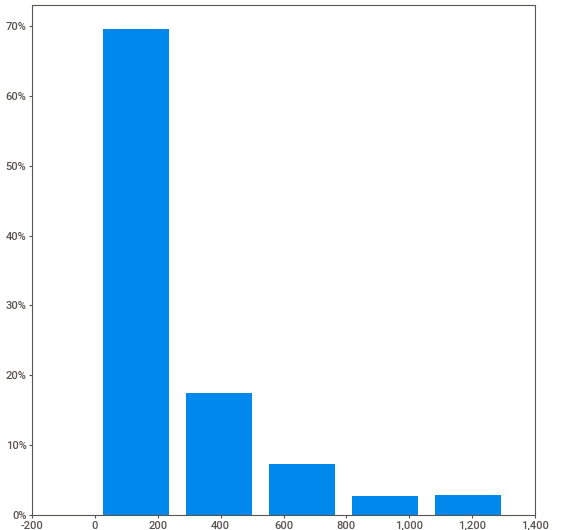
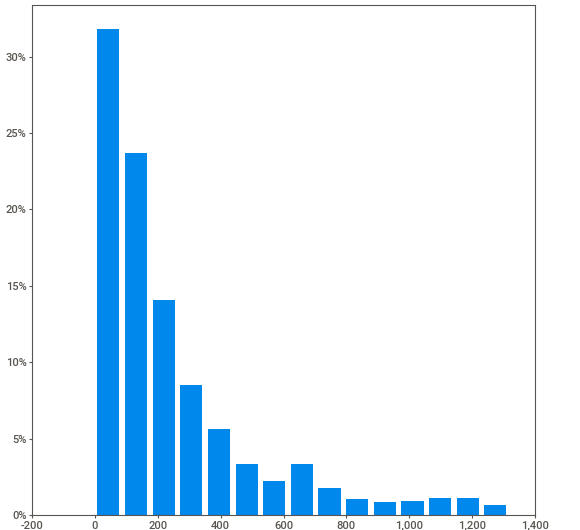
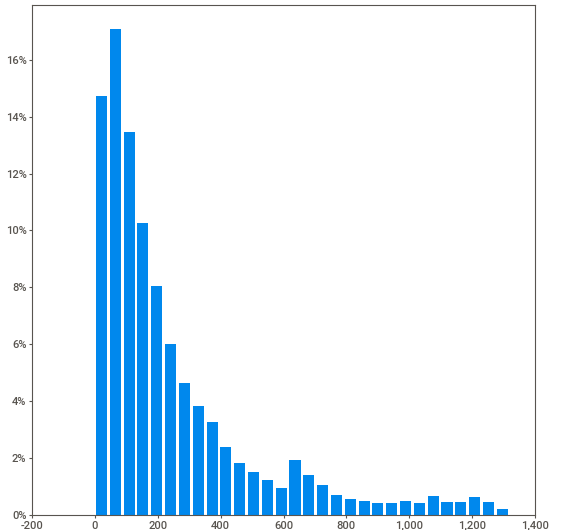
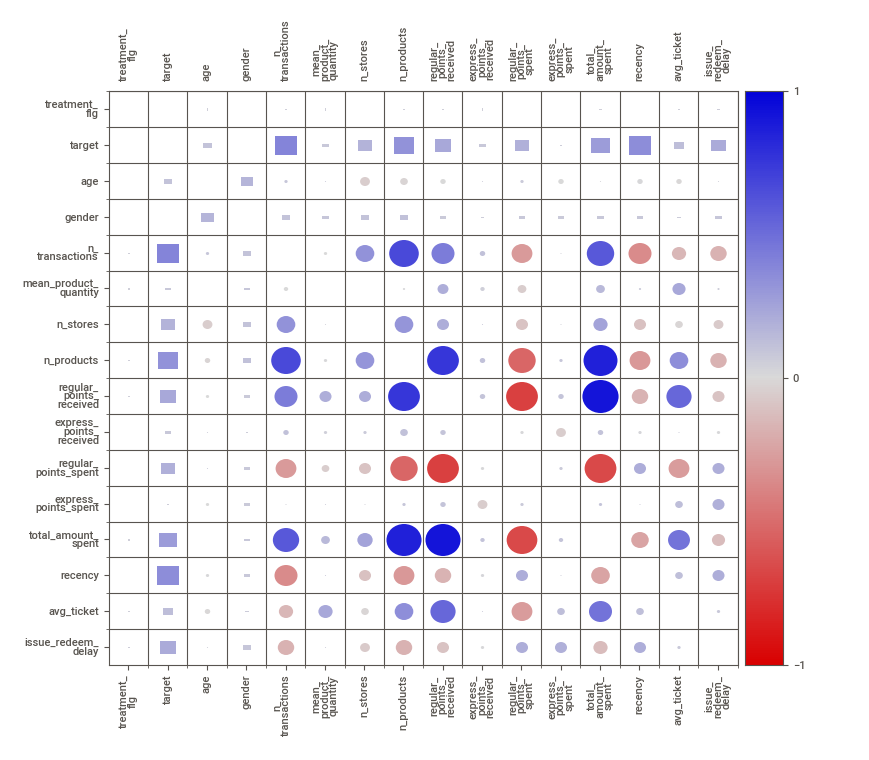
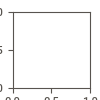

In [22]:
report = sv.analyze(df_train)
report.show_notebook(layout='widescreen')

## 3.1 Numerical features

In [57]:
# Numerical attributes
numerical = df_train.drop(columns=['gender', 'target', 'treatment_flg', 'client_id'])

In [58]:
numerical.head()

,age,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent,recency,avg_ticket,issue_redeem_delay
94636,66,6,0.960000,4,22,24.1,0,-10,-80,1875.28,7,312.546667,76
198143,53,3,1.023810,1,39,40.8,0,0,0,4004.32,1,1334.773333,51
155992,65,25,1.277372,3,58,41.9,0,0,0,7973.00,9,318.920000,63
135599,43,7,1.120690,2,50,36.8,0,-2,-30,4224.56,12,603.508571,60
106432,38,32,1.120000,1,70,45.5,0,-37,-30,7180.63,4,224.394687,79


In [59]:
numerical.columns

Index(['age', 'n_transactions', 'mean_product_quantity', 'n_stores',
       'n_products', 'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'total_amount_spent',
       'recency', 'avg_ticket', 'issue_redeem_delay'],
      dtype='object')

In [60]:
rs = RobustScaler()

In [61]:
numerical[['n_transactions', 'mean_product_quantity', 'n_stores',
       'n_products', 'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'total_amount_spent', 'avg_ticket']] = rs.fit_transform(numerical[['n_transactions', 'mean_product_quantity', 'n_stores',
       'n_products', 'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'total_amount_spent', 'avg_ticket']].values)

In [62]:
numerical.head()

,age,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent,recency,avg_ticket,issue_redeem_delay
94636,66,-0.473684,-0.807244,1.0,-0.606061,-0.342428,0.0,0.173469,-80.0,-0.531378,7,-0.234227,76
198143,53,-0.631579,-0.575028,-0.5,-0.348485,-0.114598,0.0,0.275510,0.0,-0.263473,1,2.705096,51
155992,65,0.526316,0.347742,0.5,-0.060606,-0.099591,0.0,0.275510,0.0,0.235922,9,-0.215901,63
135599,43,-0.421053,-0.222460,0.0,-0.181818,-0.169168,0.0,0.255102,-30.0,-0.235759,12,0.602408,60
106432,38,0.894737,-0.224970,-0.5,0.121212,-0.050477,0.0,-0.102041,-30.0,0.136215,4,-0.487700,79


In [63]:
ss = StandardScaler()

In [65]:
numerical = pd.DataFrame(ss.fit_transform(numerical.values), columns=numerical.columns)

In [66]:
numerical.head()

,age,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent,recency,avg_ticket,issue_redeem_delay
0,1.236443,-0.794653,-0.549636,0.542828,-0.948189,-0.540736,-0.103805,0.474732,-4.517495,-0.754318,0.030857,-0.489745,-0.639629
1,0.417810,-0.963708,-0.431519,-0.963854,-0.644917,-0.372823,-0.103805,0.550239,0.395425,-0.514801,-1.028873,2.241291,-0.734168
2,1.173471,0.276029,0.037848,0.040601,-0.305966,-0.361763,-0.103805,0.550239,0.395425,-0.068325,0.384101,-0.472718,-0.688789
3,-0.211908,-0.738301,-0.252185,-0.461627,-0.448683,-0.413042,-0.103805,0.535138,-1.446920,-0.490024,0.913966,0.287605,-0.700134
4,-0.526767,0.670490,-0.253462,-0.963854,-0.091892,-0.325567,-0.103805,0.270862,-1.446920,-0.157466,-0.499008,-0.725256,-0.628284


## 3.2 Categorical features

In [111]:
le = LabelEncoder()

In [112]:
categorical = df_train[['gender']]

In [113]:
categorical['gender_cat'] = le.fit_transform(categorical['gender'])
# categorical = categorical.reshape(len(categorical), 1)

/tmp/ipykernel_5418/926233574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['gender_cat'] = le.fit_transform(categorical['gender'])


In [114]:
categorical

,gender,gender_cat
94636,U,2
198143,U,2
155992,U,2
135599,U,2
106432,U,2
...,...,...
83781,M,1
18442,U,2
25833,M,1
103510,F,0


In [81]:
df_train['gender'].unique()

array(['U', 'F', 'M'], dtype=object)

In [116]:
# encoding
ohe = OneHotEncoder( drop='first', sparse=False)
pd.DataFrame(ohe.fit_transform(categorical[['gender']]))

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
140022,1.0,0.0
140023,0.0,1.0
140024,1.0,0.0
140025,0.0,0.0


In [117]:
categorical

,gender,gender_cat
94636,U,2
198143,U,2
155992,U,2
135599,U,2
106432,U,2
...,...,...
83781,M,1
18442,U,2
25833,M,1
103510,F,0
